<a href="https://colab.research.google.com/github/yakubszatkowski/100_days_python/blob/master/push/Google_Trends_and_Data_Visualisation_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [ ]:
df_tesla = pd.read_csv('drive/MyDrive/Colab Notebooks/Day 74 - Resampling and visualising - Google trends data/TESLA Search Trend vs Price.csv')
df_unemployment = pd.read_csv('drive/MyDrive/Colab Notebooks/Day 74 - Resampling and visualising - Google trends data/UE Benefits Search vs UE Rate 2004-19.csv')
df_btc_search = pd.read_csv('drive/MyDrive/Colab Notebooks/Day 74 - Resampling and visualising - Google trends data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('drive/MyDrive/Colab Notebooks/Day 74 - Resampling and visualising - Google trends data/Daily Bitcoin Price.csv')

# Data Exploration

In [ ]:
# some stuff i've done
# dataframes dictionary
dict_of_dataframes = {
    'df_tesla': df_tesla,
    'df_unemployment': df_unemployment,
    'df_btc_search': df_btc_search,
    'df_btc_price': df_btc_price
}

In [ ]:
# What are the shapes of the dataframes?
for df_name in dict_of_dataframes:
  print(f'{df_name} dimensions are: {dict_of_dataframes[df_name].shape}')
  print()

df_tesla dimensions are: (124, 3)

df_unemployment dimensions are: (181, 3)

df_btc_search dimensions are: (73, 2)

df_btc_price dimensions are: (2204, 3)



In [ ]:
# How many rows and columns?
for df_name in dict_of_dataframes:
  print(f'{df_name} rows: {dict_of_dataframes[df_name].shape[0]}; columns: {dict_of_dataframes[df_name].shape[1]}')
  print()

df_tesla rows: 124; columns: 3

df_unemployment rows: 181; columns: 3

df_btc_search rows: 73; columns: 2

df_btc_price rows: 2204; columns: 3



In [ ]:
# What are the column names?
for df_name in dict_of_dataframes:
  print(f'{df_name} columns names are: {dict_of_dataframes[df_name].columns.values}')
  print()

df_tesla columns names are: ['MONTH' 'TSLA_WEB_SEARCH' 'TSLA_USD_CLOSE']

df_unemployment columns names are: ['MONTH' 'UE_BENEFITS_WEB_SEARCH' 'UNRATE']

df_btc_search columns names are: ['MONTH' 'BTC_NEWS_SEARCH']

df_btc_price columns names are: ['DATE' 'CLOSE' 'VOLUME']



In [ ]:
# What is the largest number in search data column (by using .describe())
for df_name in dict_of_dataframes:
  print(f'Largest value in {df_name} is: {dict_of_dataframes[df_name].describe().loc["max"]}')
  print()

Largest value in df_tesla is: TSLA_WEB_SEARCH     31.000000
TSLA_USD_CLOSE     498.320007
Name: max, dtype: float64

Largest value in df_unemployment is: UE_BENEFITS_WEB_SEARCH    100.0
UNRATE                     10.0
Name: max, dtype: float64

Largest value in df_btc_search is: BTC_NEWS_SEARCH    100.0
Name: max, dtype: float64

Largest value in df_btc_price is: CLOSE     1.949740e+04
VOLUME    7.415677e+10
Name: max, dtype: float64



### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [ ]:
# shapes
df_tesla.shape

(124, 3)

In [ ]:
# rows and columns
print(df_tesla.shape[0], df_tesla.shape[1])

124 3


In [ ]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [ ]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')

Largest value for Tesla in Web Search: 2
Smallest value for Tesla in Web Search: 31


In [ ]:
#or by using describe (either [0] or ['TSLA_WEB_SEARCH'])
df_tesla.describe().loc['max'][0]

31.0

In [ ]:
df_tesla.describe().loc['max']['TSLA_WEB_SEARCH']

31.0

In [ ]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [ ]:
# What does a value of 100 in the Google Trend search popularity actually mean?
# it means peak popularity of the term

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [ ]:
# df_tesla, df_unemployment, df_btc_search
df_tesla.isna().values.any()  # checks if any value in the series is True

False

In [ ]:
# different method
df_tesla.isna().sum()  # sums the Trues in the series where true is missing value

MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

In [ ]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [ ]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [ ]:
df_btc_price.isna().sum()

DATE      0
CLOSE     1
VOLUME    1
dtype: int64

In [ ]:
# total values with na
df_btc_price.isna().sum().sum()

2

In [ ]:
# different method
sum_na_btc_price = df_btc_price.isna().values.sum()

In [ ]:
print(f'Number of missing values: {sum_na_btc_price}')

Number of missing values: 2


In [ ]:
# which row has missing values?
df_btc_price[df_btc_price.isna().any(axis=1)]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [ ]:
df_btc_price = df_btc_price.dropna()


In [ ]:
# this should show error as this row has been deleted
try:
  df_btc_price.loc[2148]
except KeyError:
  print('This row doesn\'t exist now')

This row doesn't exist now


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [ ]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


In [ ]:
type(df_tesla.MONTH[0])

str

In [ ]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

<ipython-input-30-8c752cfe3eb5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)


In [ ]:
type(df_tesla.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_tesla.MONTH

0     2010-06-01
1     2010-07-01
2     2010-08-01
3     2010-09-01
4     2010-10-01
         ...    
119   2020-05-01
120   2020-06-01
121   2020-07-01
122   2020-08-01
123   2020-09-01
Name: MONTH, Length: 124, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [ ]:
df_btc_search

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5
...,...,...
68,2020-05-01,22
69,2020-06-01,13
70,2020-07-01,14
71,2020-08-01,16


In [ ]:
df_btc_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


In [ ]:
# creates a df in monthly intervals with the last price of bitcoin
df_btc_monthly_last = df_btc_price.resample('M', on='DATE').last()
df_btc_monthly_last

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


In [ ]:
# creates a df in monthly intervals with the average monthly price of bitcoin
df_btc_monthly_mean = df_btc_price.resample('M', on='DATE').mean()
df_btc_monthly_mean

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07
...,...,...
2020-05-31,9263.151745,4.149575e+10
2020-06-30,9489.227214,2.169711e+10
2020-07-31,9589.899729,1.760688e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

In [ ]:
# Date formatting
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [ ]:
# Register date converters to avoid warning messages - Wasn't nessecary

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis. 

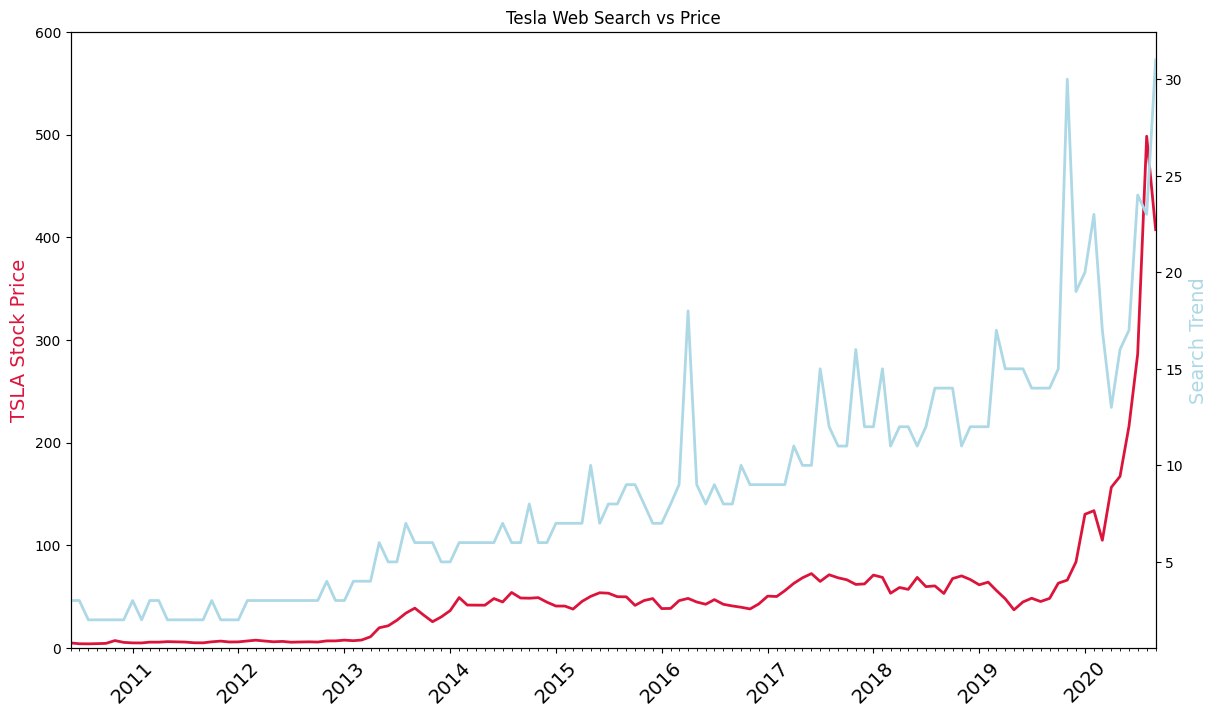

In [ ]:
plt.figure(figsize=(14,8), dpi=100)  
plt.xticks(fontsize=14, rotation=45)
plt.title('Tesla Web Search vs Price')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], label='Stock Price', color='crimson', linewidth=2)  # it is also possible to use HEX code for coloring
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], label='Search', color='lightblue', linewidth=2)

ax1.set_xlim(df_tesla['MONTH'].min(), df_tesla['MONTH'].max())
ax1.set_ylim(0,600)

ax1.set_ylabel('TSLA Stock Price', color='crimson', fontsize=14)
ax2.set_ylabel('Search Trend', color='lightblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [ ]:
# DATE column was presented in the DataFrame as index, in order to access it I've used .reset_index(), alternative way to access DATA in this case would be df_btc_monthly_last.index
df_btc_monthly_last = df_btc_monthly_last.reset_index()
df_btc_monthly_last.head()

,DATE,CLOSE,VOLUME
0,2014-09-30,386.944000,34707300.0
1,2014-10-31,338.321014,12545400.0
2,2014-11-30,378.046997,9194440.0
3,2014-12-31,320.192993,13942900.0
4,2015-01-31,217.464005,23348200.0


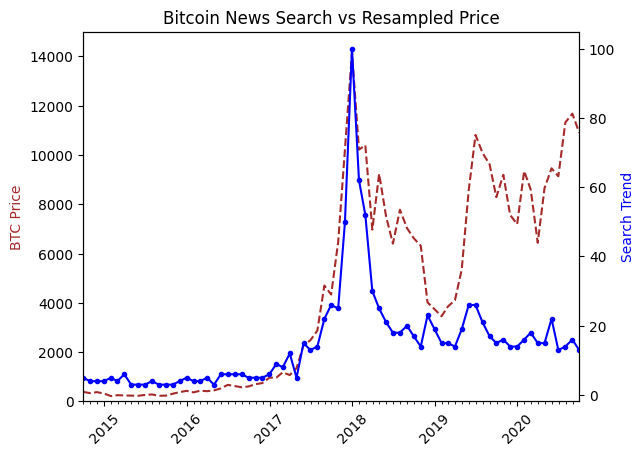

In [ ]:
plt.title('Bitcoin News Search vs Resampled Price')
plt.xticks(rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_btc_monthly_last['DATE'], df_btc_monthly_last['CLOSE'], label='BTC Price', color='brown', linestyle='--')  # also may be linestyle = 'dashed'
ax2.plot(df_btc_monthly_last['DATE'], df_btc_search['BTC_NEWS_SEARCH'], label='Search Trend', color='blue', marker='.')

ax1.set_ylabel('BTC Price', color='brown')
ax2.set_ylabel('Search Trend', color='blue')

ax1.set_xlim(df_btc_monthly_last['DATE'].min(),df_btc_monthly_last['DATE'].max())
ax1.set_ylim(0, 15000)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

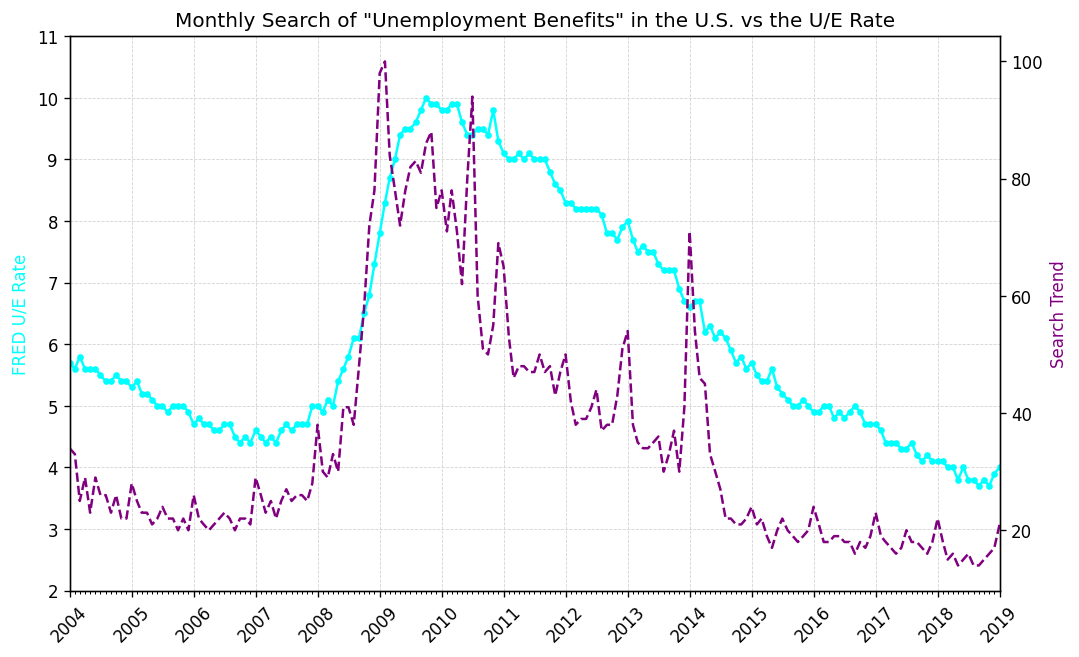

In [ ]:
plt.figure(figsize=(10,6), dpi=120) 
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
plt.xticks(rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], label='FRED U/E Rate', color='cyan', marker='.')  # colors are reversed in the course!
ax2.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], label='Search Trend', color='purple', linestyle='--')

ax1.set_ylabel('FRED U/E Rate', color='cyan')
ax2.set_ylabel('Search Trend', color='purple')

ax1.set_xlim(df_unemployment['MONTH'].min(), df_unemployment['MONTH'].max())
ax1.set_ylim(2, 11)

ax1.grid(color='lightgrey', linestyle='--', linewidth=0.5)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

In [ ]:
df_unemployment.tail()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
176,2018-09-01,14,3.7
177,2018-10-01,15,3.8
178,2018-11-01,16,3.7
179,2018-12-01,17,3.9
180,2019-01-01,21,4.0


**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [ ]:
rolling_avr_web_search_unemployment = df_unemployment['UE_BENEFITS_WEB_SEARCH'].rolling(6).mean()
df_unemployment['ROLLING AVG'] = rolling_avr_web_search_unemployment
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE,ROLLING AVG
0,2004-01-01,34,5.7,NaN
1,2004-02-01,33,5.6,NaN
2,2004-03-01,25,5.8,NaN
3,2004-04-01,29,5.6,NaN
4,2004-05-01,23,5.6,NaN
...,...,...,...,...
176,2018-09-01,14,3.7,14.833333
177,2018-10-01,15,3.8,14.666667
178,2018-11-01,16,3.7,15.000000
179,2018-12-01,17,3.9,15.333333


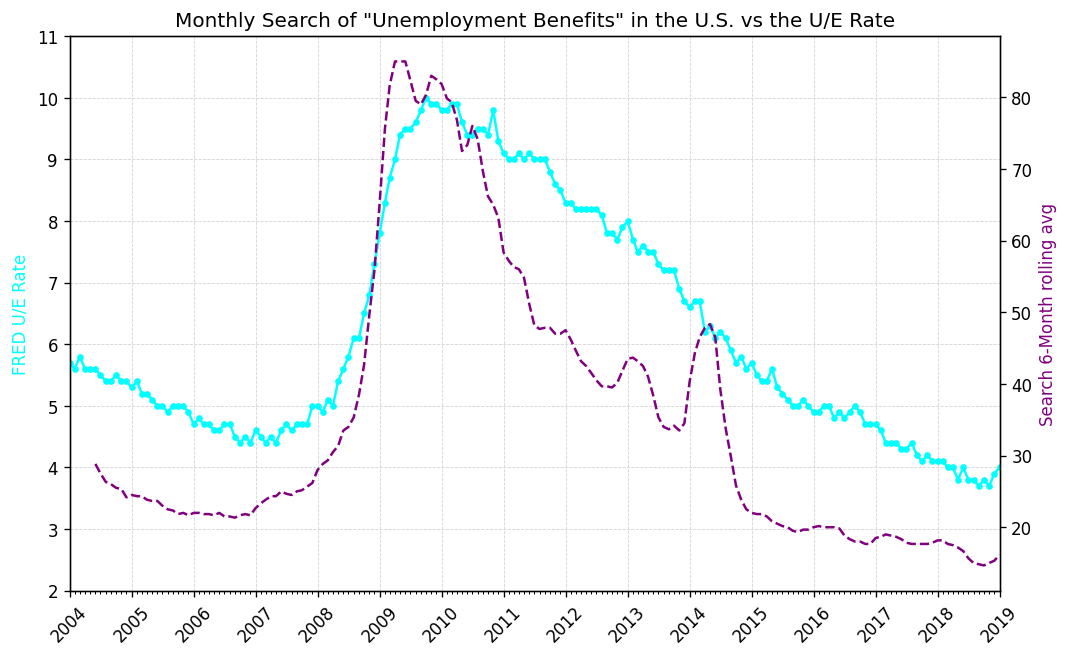

In [ ]:
plt.figure(figsize=(10,6), dpi=120) 
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
plt.xticks(rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], label='FRED U/E Rate', color='cyan', marker='.')  # colors are reversed in the course!
ax2.plot(df_unemployment['MONTH'], df_unemployment['ROLLING AVG'], label='Search 6-Month rolling avg', color='purple', linestyle='--')

ax1.set_ylabel('FRED U/E Rate', color='cyan')
ax2.set_ylabel('Search 6-Month rolling avg', color='purple')

ax1.set_xlim(df_unemployment['MONTH'].min(), df_unemployment['MONTH'].max())
ax1.set_ylim(2, 11)

ax1.grid(color='lightgrey', linestyle='--', linewidth=0.5)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?